# <font color=#cd0000> Propósito principal </font>
- La idea de este librillo es estudiar la composición y la forma de los datos del conjunto de datos `Epilepsy`.

## <font color=#cd0000> Leyenda </font>
- Los apartados titulados con el código de colores HEX: `#cd0000` serán apartados que tendrán todos los librillos, en concreto, aquellos especificados en el apartado `Síntesis de los criterios usados` del trabajo.
- Los apartados titulados con el código de colores HEX: `#2451ff` serán apartados de conclusiones propias de este librillo resultado de aplicar un estudio personalizado para cada planteamiento.

# <font color=#cd0000> Prerrequisitos </font>
## <font color=#cd0000> Entorno de ejecución </font>
- Cambiamos el directorio raíz del librillo para acceder cómodamente a las funciones de utilidad.

In [1]:
import os

os.chdir('../../')

## <font color=#cd0000> Constantes y variables predefinidas </font>

In [2]:
EPILEPSY_PATH = "data/epilepsy"

# <font color=#cd0000> Análisis de Epilepsy </font>
- Fuente: http://timeseriesclassification.com/description.php?Dataset=Epilepsy

## <font color=#cd0000> Extracción de datos </font>

In [3]:
from utils.load_data import import_epilepsy_dataset

train, test = import_epilepsy_dataset(EPILEPSY_PATH)

## <font color=#cd0000> Generación automática de reporte estadístico </font>
- Podemos observarlo con un navegador abriendo el fichero ya generado en la ruta: `./Pruebas/Epilepsy/report/epilepsy_report.html`

In [4]:
# import pandas_profiling

# report = pandas_profiling.ProfileReport(train.original_data)
# report.to_file(output_file="epilepsy_report.html")

## <font color=#cd0000> Análisis a simple vista </font>
- Analizaremos los datos generados por el reporte automático de estadísticas brindado por Pandas-Profiling.
- Observamos que nuestro DS está compuesto de:
  - 3 atributos continuos (``dim_0``, ``dim_1``, ``dim_2``) que corresponden con las medidas de los 3 sensores acelerómetros que se mencionan en la descripción del DS en ``timeseriesclassification.com``.
  - 1 atributo discreto que es el identificador de la serie a la que pertenece cada muestra.
  - 1 atributo continuo que es la marca temporal de la muestra (el orden en que está dispuesta en la serie)
  - 1 atributo discreto que corresponde con la clase donde tenemos 4 clases:
    - ``walking``
    - ``running``
    - ``epilepsy``
    - ``sawing``

### <font color=#cd0000> Concentración de los datos </font>
- Podemos observar que los datos se concentran alrededor del rango de valores ``[-3, 3]``, no obstante, estos datos no se encuentran normalizados ya que, el atributo ``dim_2`` comprende valores que no llegan al rango ``[-3, 3]``, solo a ``[-2.02, 2.58]`` por lo que será necesario normalizar si queremos tratar este DS con el clasificador LSTM.

### <font color=#cd0000> Missing Values </font>
- Este DS no contiene missing values.

### <font color=#cd0000> Matriz de correlación </font>
- Estudiando la matriz de correlación generada a partir del coeficiente de correlación de Pearson observamos que:
  - Los atributos no se encuentran correlacionados entre sí por lo que, al tener una baja dimensionalidad, no recomendaría eliminar ninguno de ellos y, en caso de poder aumentar la dimensionalidad, recomendaría hacerlo.

### <font color=#cd0000> Balanceo de las clases </font>
- El DS se encuentra bastante balanceado, no obstante, podemos observar una clase minoritaria y otra mayoritaria.
- La diferencia anterior es muy pequeña pero apreciable por lo que recomendamos utilizar la técnica de pesado de clases para ser lo más justos posible.
- Número de ejemplos de cada clase:
  - ``walking``: 74 series (37 en train y 37 en test)
  - ``running``: 73 series (36 en train y 37 en test)
  - ``epilepsy``: 68 series (34 en train y 34 en test)
  - ``sawing``: 60 series (30 en train y 30 en test)

## <font color=#cd0000> Análisis en profundidad </font>
- Analizaremos las series de cada atributo en mayor profundidad.

### <font color=#cd0000> Desplazamiento entre los atributos </font>

In [5]:
from utils.plot_utils import plot_series
import pandas as pd

%matplotlib inline

def plot_all_signals_from_serie_id(df, id):
    serie_id = id

    dim_0_serie = df[df['id'] == serie_id]['dim_0']
    dim_1_serie = df[df['id'] == serie_id]['dim_1']
    dim_2_serie = df[df['id'] == serie_id]['dim_2']

    series_to_plot = [dim_0_serie, dim_1_serie, dim_2_serie]

    labels = ["dim_0_serie", "dim_1_serie", "dim_2_serie"]

    plot_series(series_to_plot, labels)

#### <font color=#2451ff> Desplazamiento entre atributos por clases </font>
- Llevamos a cabo este subapartado dado que nos encontramos ante un problema multiclase donde las series de diferentes clases tienen distintas formas.

##### <font color=#2451ff> Clase walking </font>
- No observamos un retraso apreciable en ninguna de las series y, como hasta ahora, observamos una evolución bien sincronizada de estas salvo por algún error de medida al comienzo/final de las series.

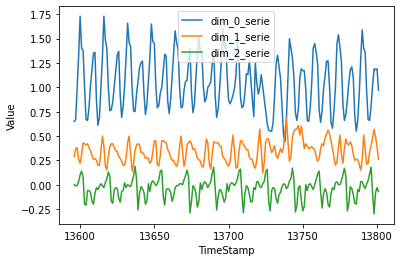

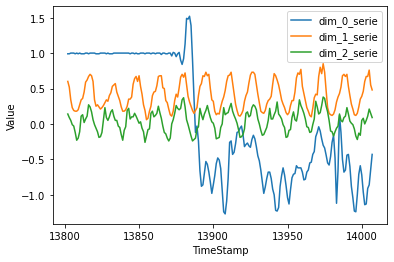

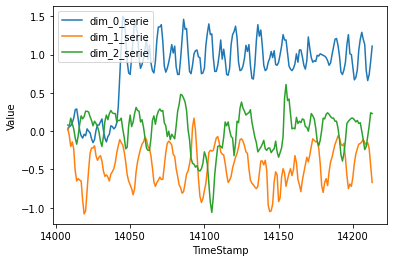

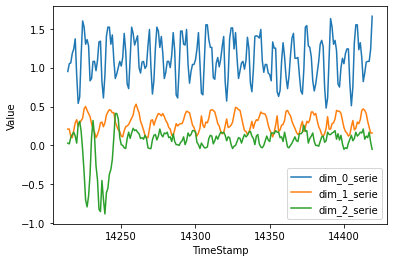

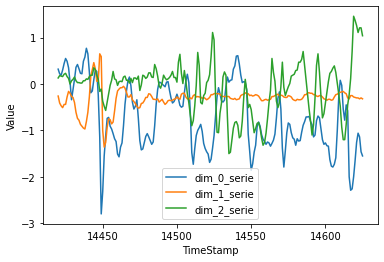

In [20]:
wal_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'walking']['id'])

for identificator in wal_ids[-5:]:
    plot_all_signals_from_serie_id(train.derived_data, identificator)


##### <font color=#2451ff> Clase running </font>
- De nuevo, observamos una evolución bien sincronizada de las series.

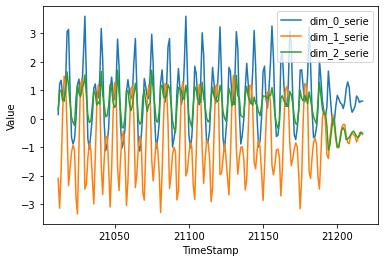

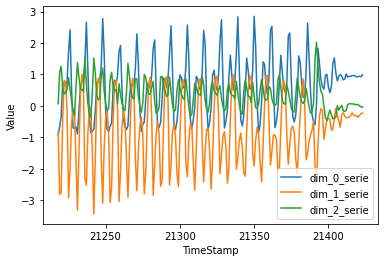

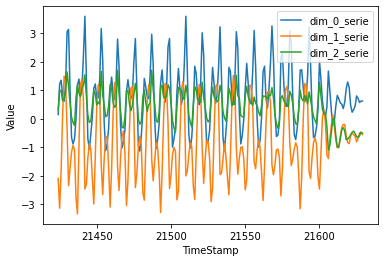

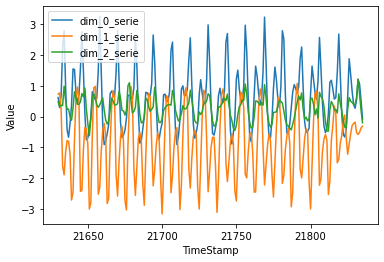

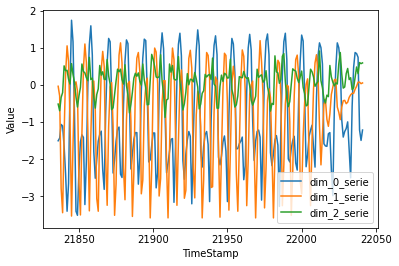

In [17]:
run_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'running']['id'])

for identificator in run_ids[-5:]:
    plot_all_signals_from_serie_id(train.derived_data, identificator)


##### <font color=#2451ff> Clase sawing </font>
- De nuevo, observamos una evolución bien sincronizada de las series.

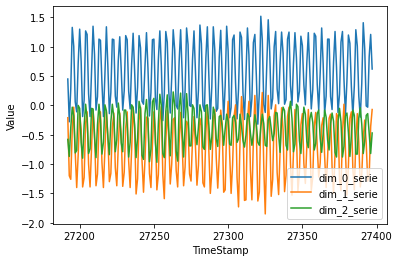

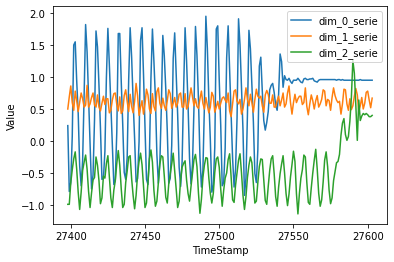

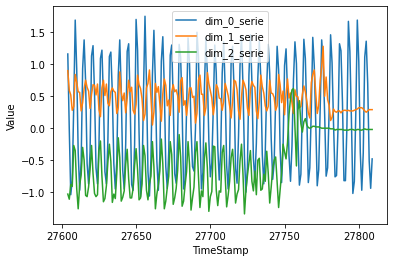

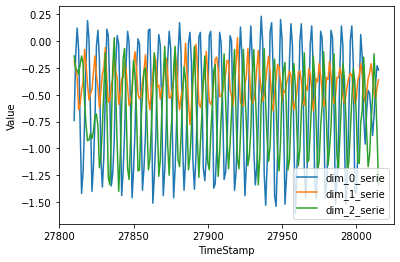

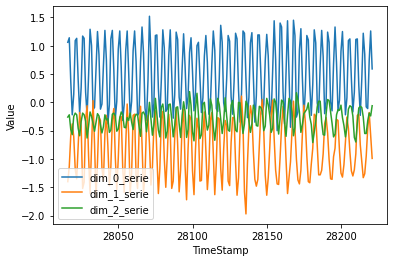

In [18]:
saw_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'sawing']['id'])

for identificator in saw_ids[-5:]:
    plot_all_signals_from_serie_id(train.derived_data, identificator)


##### <font color=#2451ff> Clase epilepsy </font>
- En este caso observamos que la evolución de las series es desincronizada y errática lo que caracteriza a esta clase a diferencia de las demás.

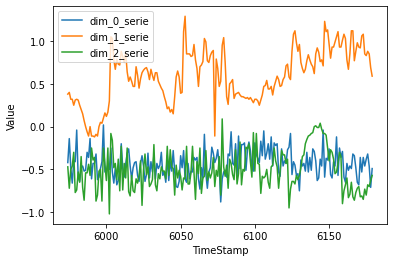

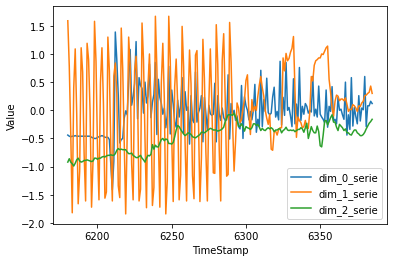

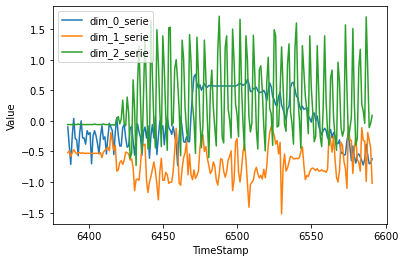

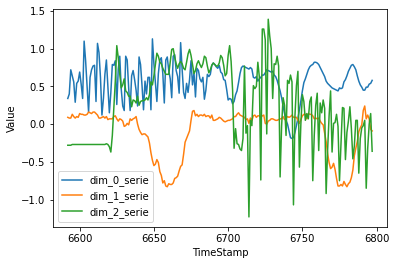

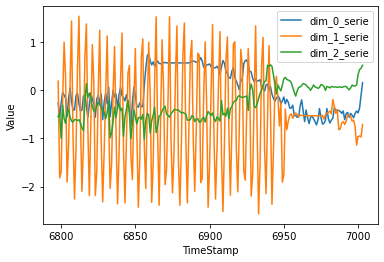

In [15]:
import pandas as pd
epi_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'epilepsy']['id'])

for identificator in epi_ids[-5:]:
    plot_all_signals_from_serie_id(train.derived_data, identificator)


#### <font color=#2451ff> Conclusiones </font>
- Podemos observar unas series cuasi-periódicas donde, la amplitud de los diferentes atributos, es bastante diferente (lo que reafirma nuestro objetivo de normalizar el conjunto de datos cuando utilicemos LSTM o cualquier otro estimador dependiente de la escala de los datos).
  - Podemos intuir que, la amplitud de cada serie, nos da pistas muy informativas sobre la tarea que está desempeñando el paciente.
  - Lo anterior lo podemos razonar porque, para tareas más demandantes (físicamente) obtenemos mayores amplitudes y mayor variabilidad en los sensores y viceversa para las menos demandantes.
- En cuanto al desplazamiento de los atributos podemos observar que avanzan a la par (cuando un atributo asciende, su vecino, también y viceversa).
  - No obstante, observamos casos en los que los sensores dejan de medir y sus valores descienden a un valor concreto de manera estacionaria, esto puede deberse a errores de medida o a una parada temprana de la medición en diferentes sensores.
  - Intuimos que los errores anteriores pueden deberse a una parada temprana o un inicio tardío de los aparatos de medición porque suelen ocurrir al principio y final de las señales

### <font color=#cd0000> Variabilidad y velocidad de cambios </font>
- Vamos a observar la variabilidad y velocidad de cambios de cada clase sirviéndonos de los gráficos del apartado anterior (``Desplazamiento entre los atributos``).

#### <font color=#2451ff> Variabilidad y velocidad de cambios por clase </font>
- Llevamos a cabo este subapartado dado que nos encontramos ante un problema multiclase donde las series de diferentes clases tienen distintas formas.

##### <font color=#2451ff> Clase walking </font>
- Observamos un avance mucho más lento (poca variabilidad en los datos) y de una amplitud mucho menor que el resto de clases que veremos a continuación.
- Esta forma de las series es la correspondiente a la de una actividad de baja intensidad lo que tiene sentido en el contexto de la actividad que estamos tratando.
- Sería interesante estudiar esta clase a resoluciones bajas.
  

##### <font color=#2451ff> Clase running </font>
- En esta ocasión visualizamos un avance con gran variabilidad y de amplitud mayor a los ejemplos de clase ``walking``.
- Sería interesante estudiar esta clase a resoluciones altas.
  

##### <font color=#2451ff> Clase sawing </font>
- Las series de esta clase avanzan con mayor variabilidad que las de la clase ``running`` que ya eran rápidas y con una amplitud inferior a las de la clase ``running`` (por lo que podrían ser caracterizadas).
- Sería interesante estudiar esta clase a resoluciones altas.
  

##### <font color=#2451ff> Clase epilepsy </font>
- Las series de esta clase son rápidas en una dimensión y lentas en otra (mayor y menor variabilidad, respectivamente) lo que caracteriza a estas series pues, el resto, contienen dimensiones con variabilidades muy similares entre sí.
- Sería interesante estudiar esta clase a resoluciones altas.
  

#### <font color=#2451ff> Conclusiones </font>
- Podemos observar que la gran mayoría de clases contienen series con gran variabilidad por lo que sería interesante estudiarlas a alta resolución.
  - Por lo que no recomendaría eliminar muestras para caracterizar la variabilidad de las series a partir de la codificación de la ``Tendencia`` y la ``Aceleración``.
  - No obstante, en el caso de observar que la clase ``walking`` se clasifica incorrectamente con gran diferencia, podríamos reducir la resolución con el fin de mejorar su clasificación.

### <font color=#cd0000> Estacionariedad de las series </font>
- Podemos observar que nos enfrentamos ante series cuasi-periódicas por la forma en que se encuentran dispuestas (de hecho son muy parecidas a una onda sinusoidal).
- Podría ser interesante aplicar un análisis de Fourier o una transformada Wavelet para codificar las series.

### <font color=#cd0000> Tendencia de las series </font>
- No observamos ningún tipo de tendencia ascendente ni descendente en ninguna de las clases salvo en la clase ``epilepsy`` donde se observa, en ocasiones, una ligera tendencia.
  - En caso de clasificar incorrectamente los ejemplos de clase ``epilepsy`` podríamos eliminar la tendencia de las muestras de la clase para compararla justamente con las demás aunque, es posible, que esa codificación fuese a peor.

#### <font color=#cd0000> Normalización de los datos </font>
- Por lo que observaremos más adelante, no existe una pérdida de la tendencia de las series de clase ``epilepsy`` y se sigue logrando capturar satisfactoriamente las características del conjunto de datos (la variabilidad de las series, fundamentalmente)

In [6]:
from utils.codifications import standardize_data

columns = train.get_derived_data_columns()['attrs']
standardized_data = standardize_data(train.original_data, headers=columns)

##### <font color=#2451ff> Clase walking </font>
- No observamos ninguna pérdida de información notable tras estandarizar los datos.

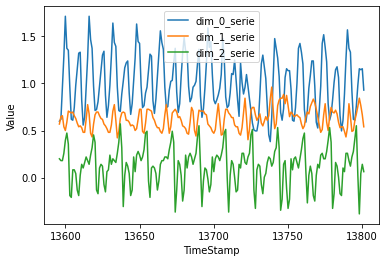

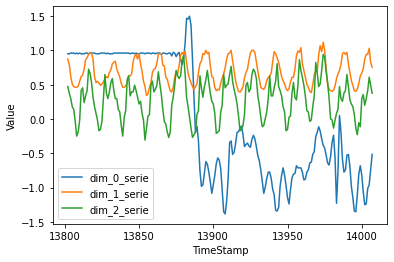

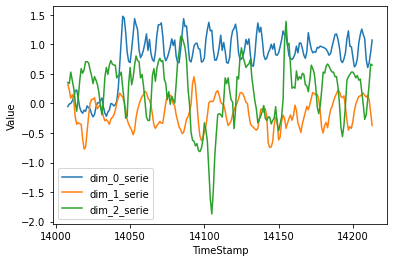

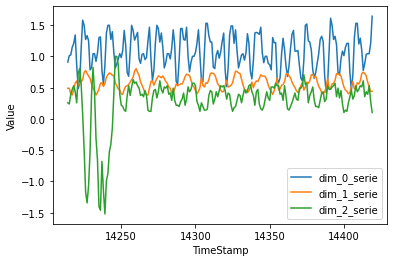

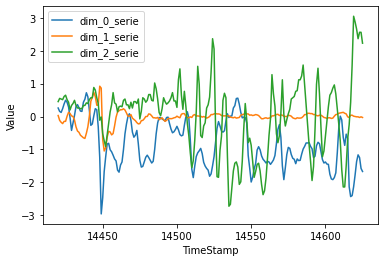

In [7]:
wal_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'walking']['id'])

for identificator in wal_ids[-5:]:
    plot_all_signals_from_serie_id(standardized_data, identificator)


##### <font color=#2451ff> Clase running </font>
- De nuevo, no observamos ninguna pérdida de información notable tras estandarizar los datos.

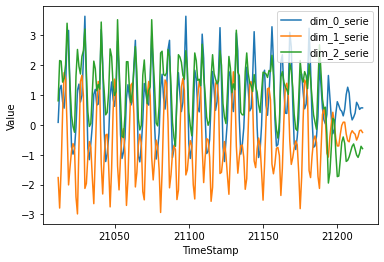

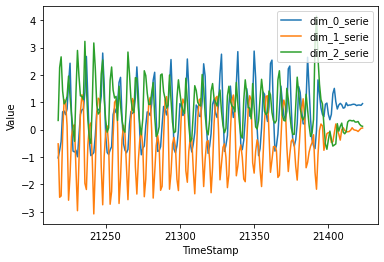

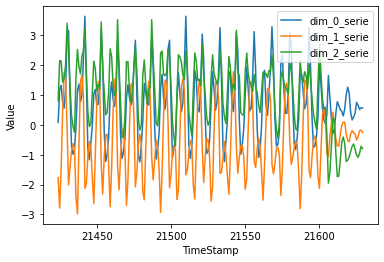

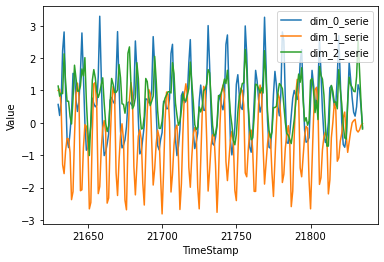

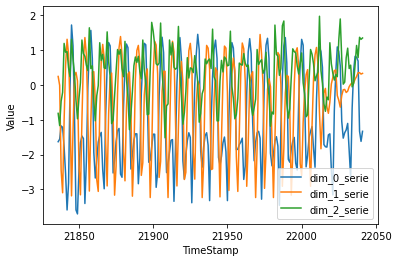

In [9]:
run_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'running']['id'])

for identificator in run_ids[-5:]:
    plot_all_signals_from_serie_id(standardized_data, identificator)


##### <font color=#2451ff> Clase sawing </font>
- De nuevo, no observamos ninguna pérdida de información notable tras estandarizar los datos.

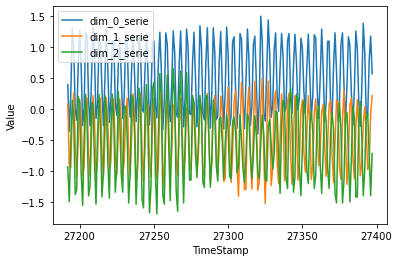

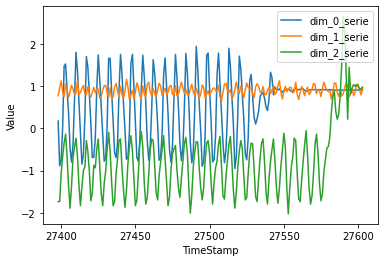

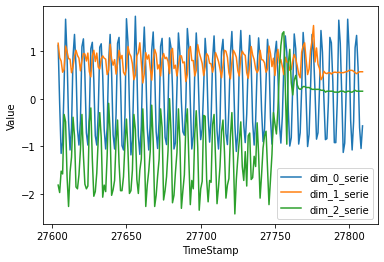

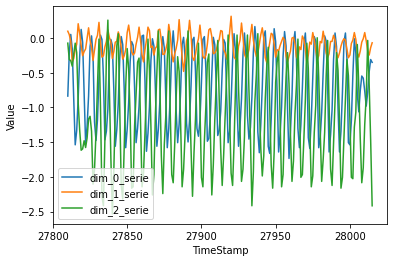

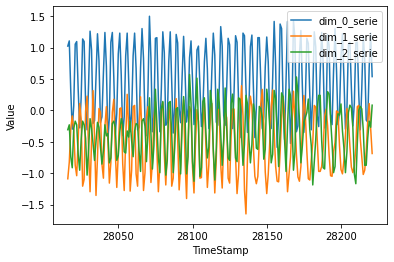

In [12]:
saw_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'sawing']['id'])

for identificator in saw_ids[-5:]:
    plot_all_signals_from_serie_id(standardized_data, identificator)


##### <font color=#2451ff> Clase epilepsy </font>
- De nuevo, no observamos ninguna pérdida de información notable tras estandarizar los datos.

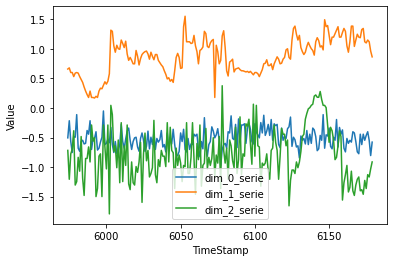

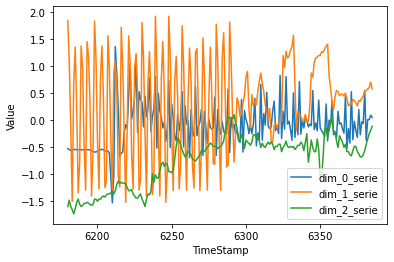

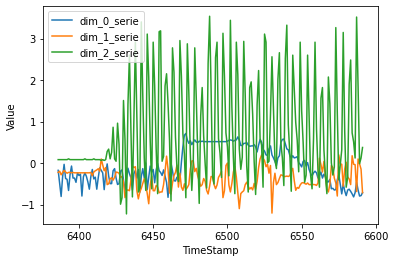

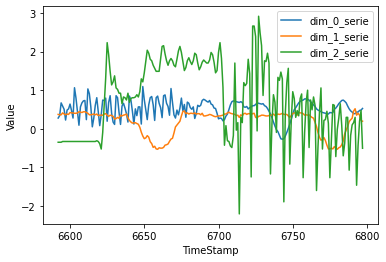

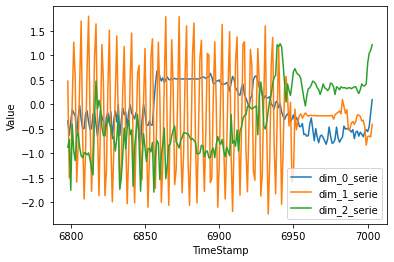

In [13]:
import pandas as pd
epi_ids = pd.unique(
    train.derived_data[train.derived_data['class'] == 'epilepsy']['id'])

for identificator in epi_ids[-5:]:
    plot_all_signals_from_serie_id(standardized_data, identificator)


# <font color=#cd0000> Aplicación preliminar de las nociones anteriores </font>
- Vamos a probar a utilizar la codificación de la ``Tendencia`` y la ``Aceleración`` para caracterizar la variabilidad de las series.

In [77]:
train.reset_changes()
test.reset_changes()

In [78]:
from utils.codifications import temporal_trend_fn

# Trend's codification
train.apply_codifications([temporal_trend_fn])
test.apply_codifications([temporal_trend_fn])

In [79]:
columns = train.get_derived_data_columns()['attrs']
trend_columns = list(filter(lambda z: 'Diff' in z, columns))

# Acceleration's codification
train.apply_codifications([temporal_trend_fn], headers=trend_columns)
test.apply_codifications([temporal_trend_fn], headers=trend_columns)


In [80]:
train.derived_data

,id,TimeStamp,dim_0,dim_0Diff,dim_0DiffDiff,dim_1,dim_1Diff,dim_1DiffDiff,dim_2,dim_2Diff,dim_2DiffDiff,class
0,0,2,0.44,0.04,-0.01,-0.71,-0.72,-0.51,0.52,0.01,0.05,epilepsy
1,0,3,0.47,0.03,-0.01,-0.33,0.38,1.10,0.44,-0.08,-0.09,epilepsy
2,0,4,0.48,0.01,-0.02,-0.40,-0.07,-0.45,0.45,0.01,0.09,epilepsy
3,0,5,0.47,-0.01,-0.02,0.19,0.59,0.66,0.56,0.11,0.10,epilepsy
4,0,6,0.44,-0.03,-0.02,0.36,0.17,-0.42,0.71,0.15,0.04,epilepsy
...,...,...,...,...,...,...,...,...,...,...,...,...
27943,136,201,-0.08,-0.93,-0.56,-0.95,0.31,0.24,-0.55,0.00,0.29,sawing
27944,136,202,-0.11,-0.03,0.90,-0.47,0.48,0.17,-0.33,0.22,0.22,sawing
27945,136,203,0.73,0.84,0.87,-0.18,0.29,-0.19,-0.19,0.14,-0.08,sawing
27946,136,204,1.26,0.53,-0.31,-0.60,-0.42,-0.71,-0.24,-0.05,-0.19,sawing


## <font color=#cd0000> Sobre SMTS </font>

In [81]:
from smts_implementation.smts import SMTS

clf = SMTS(j_ins=100, n_symbols=150, random_state=2)
clf.fit(train.derived_data.drop(['TimeStamp', 'class'], axis=1),
        train.derived_data['class'])
clf.score(test.derived_data.drop(['TimeStamp', 'class'], axis=1),
          test.derived_data['class'])


0.9710144927536232

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(test.derived_data.drop(['TimeStamp', 'class'], axis=1))
y_real = test.derived_data.groupby('id').first()['class'].to_numpy()

print(confusion_matrix(y_real, y_pred))
print(classification_report(y_real, y_pred))

[[32  0  1  1]
 [ 1 35  1  0]
 [ 0  0 30  0]
 [ 0  0  0 37]]
              precision    recall  f1-score   support

    epilepsy       0.97      0.94      0.96        34
     running       1.00      0.95      0.97        37
      sawing       0.94      1.00      0.97        30
     walking       0.97      1.00      0.99        37

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



## <font color=#cd0000> Sobre RF </font>

In [83]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=100, n_estimators=150)
clf.fit(train.derived_data.drop(['id', 'class'], axis=1),
        train.derived_data['class'])
clf.score(test.derived_data.drop(['id', 'class'], axis=1),
          test.derived_data['class'])


0.8714478545041204

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(test.derived_data.drop(['id', 'class'], axis=1))
y_real = test.derived_data['class'].to_numpy()

print(confusion_matrix(y_real, y_pred))
print(classification_report(y_real, y_pred))

[[5683  418  330  505]
 [ 354 6572  391  231]
 [  73  362 5574  111]
 [ 443  284  117 6704]]
              precision    recall  f1-score   support

    epilepsy       0.87      0.82      0.84      6936
     running       0.86      0.87      0.87      7548
      sawing       0.87      0.91      0.89      6120
     walking       0.89      0.89      0.89      7548

    accuracy                           0.87     28152
   macro avg       0.87      0.87      0.87     28152
weighted avg       0.87      0.87      0.87     28152



## <font color=#cd0000> Sobre LSTM </font>

### <font color=#cd0000> Preparación de los datos </font>

In [85]:
from utils.codifications import standardize_data

train.derived_data, test.derived_data = standardize_data(
    train.derived_data,
    test.derived_data,
    headers=train.get_derived_data_columns()['attrs']
)

In [86]:
# All lengths must be equal
series_length = train.get_shortest_serie().shape[0]
n_dims = len(train.get_derived_data_columns()['attrs'])

(
    train.get_shortest_serie().shape[0],
    train.get_largest_serie().shape[0],
    test.get_shortest_serie().shape[0],
    test.get_largest_serie().shape[0]
)


(204, 204, 204, 204)

In [87]:
import pandas as pd

# This will determine the number of series of each split
train_n_series = pd.unique(train.derived_data['id']).shape[0]
test_n_series = pd.unique(test.derived_data['id']).shape[0]

(train_n_series, test_n_series)


(137, 138)

In [88]:
X_train, _ = train.transform_derived_data_into_X_y()
X_test, _ = test.transform_derived_data_into_X_y()

y_train = train.derived_data.groupby('id').first()['class'].to_numpy()
y_test = test.derived_data.groupby('id').first()['class'].to_numpy()


In [89]:
from utils.classifier_utils import apply_lstm_format
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))

X_train, y_train = apply_lstm_format(
    X_train, y_train.reshape(-1, 1), train_n_series, series_length, 2, enc)
X_test, y_test = apply_lstm_format(
    X_test, y_test.reshape(-1, 1), test_n_series, series_length, 2, enc)


### <font color=#cd0000> Diseño del modelo </font>

In [90]:
import numpy as np
import keras.backend as K


def argmax(x, n_classes):
    all_predictions = []
    for max_class_position in K.argmax(x):
        prediction = np.zeros(n_classes)
        prediction.put(max_class_position, 1)
        all_predictions.append(prediction)
    return np.asarray(all_predictions)


In [91]:
import keras as k
from keras.models import Sequential
from keras.layers import LSTM, Dense

nn = Sequential()

# Number of initial dimensions
nn.add(LSTM(units=12, dropout=.2, recurrent_dropout=.2))
# Number of Epilepsy's classes
nn.add(Dense(4, activation='sigmoid'))

### <font color=#cd0000> Compilación del modelo </font>

In [92]:
from keras.optimizers import RMSprop

metrics = [
    k.metrics.CategoricalAccuracy(name="ACC"),
    k.metrics.Precision(name='Prec'),
    k.metrics.Recall(name='Rec'),
    k.metrics.AUC(name='AUC')
]

nn.compile(optimizer=RMSprop(
    learning_rate=1e-3), loss='categorical_crossentropy', metrics=metrics)


### <font color=#cd0000> Visualización de métricas </font>

In [93]:
import matplotlib.pyplot as plt


def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()


### <font color=#cd0000> Entrenamiento </font>

Epoch 1/100
9/9 [==============================] - 1s 128ms/step - loss: 1.3700 - ACC: 0.2737 - Prec: 0.3184 - Rec: 0.6752 - AUC: 0.5937 - val_loss: 1.3460 - val_ACC: 0.2717 - val_Prec: 0.3299 - val_Rec: 0.6920 - val_AUC: 0.6412
Epoch 2/100
9/9 [==============================] - 0s 36ms/step - loss: 1.3449 - ACC: 0.3869 - Prec: 0.3452 - Rec: 0.7080 - AUC: 0.6637 - val_loss: 1.3279 - val_ACC: 0.3188 - val_Prec: 0.3541 - val_Rec: 0.7428 - val_AUC: 0.6835
Epoch 3/100
9/9 [==============================] - 0s 35ms/step - loss: 1.3262 - ACC: 0.4088 - Prec: 0.3661 - Rec: 0.7482 - AUC: 0.7007 - val_loss: 1.3077 - val_ACC: 0.3514 - val_Prec: 0.3786 - val_Rec: 0.7681 - val_AUC: 0.7160
Epoch 4/100
9/9 [==============================] - 0s 35ms/step - loss: 1.3100 - ACC: 0.4562 - Prec: 0.3810 - Rec: 0.7774 - AUC: 0.7226 - val_loss: 1.2849 - val_ACC: 0.3986 - val_Prec: 0.3925 - val_Rec: 0.8007 - val_AUC: 0.7389
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 1.2859 - ACC: 0

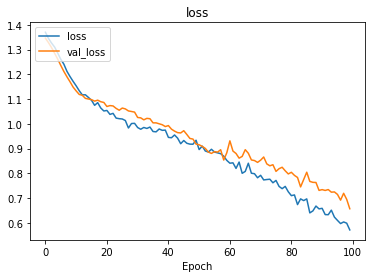

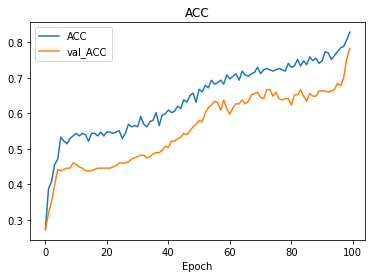

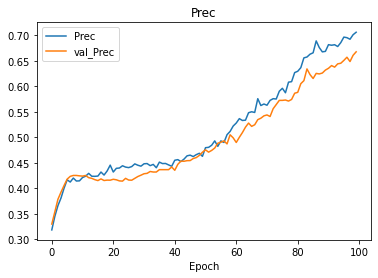

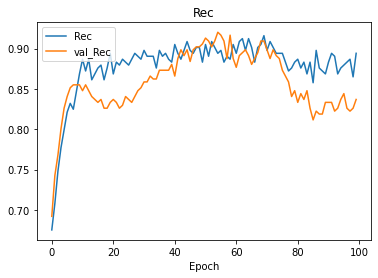

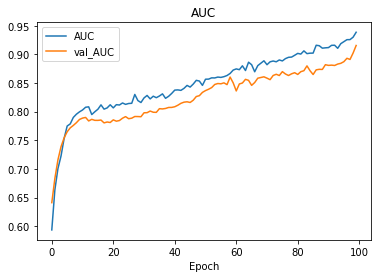

In [94]:
import numpy as np
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report

epochs = 100

history = nn.fit(X_train, y_train, epochs=epochs,
                 validation_data=(X_test, y_test),
                 verbose=1)
nn.summary()
print('\n\n')

y_pred = argmax(nn.predict(X_test), 4)

show_metrics(history)


In [95]:
y_real = enc.inverse_transform(y_test)
y_pred = enc.inverse_transform(y_pred)
print(confusion_matrix(y_real, y_pred))
print(classification_report(y_real, y_pred, zero_division=0))


[[46  4 16  2]
 [ 9 60  1  4]
 [ 5  1 54  0]
 [ 3 13  2 56]]
              precision    recall  f1-score   support

    epilepsy       0.73      0.68      0.70        68
     running       0.77      0.81      0.79        74
      sawing       0.74      0.90      0.81        60
     walking       0.90      0.76      0.82        74

    accuracy                           0.78       276
   macro avg       0.79      0.79      0.78       276
weighted avg       0.79      0.78      0.78       276

